<a href="https://colab.research.google.com/github/vgeneva/optimization_Julia/blob/main/Newton_Method_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thank you Optimal Control Course:

https://github.com/Optimal-Control-16-745/lecture-notebooks/blob/master/Lecture%203/minimization.ipynb

This Google colab is using Julia instead of Python.  I needed to download Julia first and learned I need to do this everytime I conduct Julia on Google colabb.

In [ ]:
# Do this everytime for Julia
# Download Julia
!wget https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.7-linux-x86_64.tar.gz

# Extract Julia
!tar -xvzf julia-1.6.7-linux-x86_64.tar.gz

# Move Julia to a directory
!mv julia-1.6.7 /usr/local/julia

# Add Julia to the PATH
!ln -s /usr/local/julia/bin/julia /usr/local/bin/julia

--2024-10-01 17:47:13--  https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.7-linux-x86_64.tar.gz
Resolving julialang-s3.julialang.org (julialang-s3.julialang.org)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to julialang-s3.julialang.org (julialang-s3.julialang.org)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114281842 (109M) [application/x-tar]
Saving to: ‘julia-1.6.7-linux-x86_64.tar.gz’

julia-1.6.7-linux-x 100%[===================>] 108.99M   235MB/s    in 0.5s    

2024-10-01 17:47:13 (235 MB/s) - ‘julia-1.6.7-linux-x86_64.tar.gz’ saved [114281842/114281842]

julia-1.6.7/
julia-1.6.7/LICENSE.md
julia-1.6.7/share/
julia-1.6.7/share/doc/
julia-1.6.7/share/doc/julia/
julia-1.6.7/share/doc/julia/html/
julia-1.6.7/share/doc/julia/html/en/
julia-1.6.7/share/doc/julia/html/en/search_index.js
julia-1.6.7/share/doc/julia/html/en/devdocs/
julia-1.6.7/share/doc/julia/html/en/devdocs/sanitizers.html
julia-1.6.7/share/do

In [ ]:
!julia --version


julia version 1.6.7


In [ ]:
!julia -e 'using Pkg; Pkg.add("IJulia"); using IJulia'


  Installing known registries into `~/.julia`
       Added registry `General` to `~/.julia/registries/General`
   Resolving package versions...
   Installed ZeroMQ_jll ────── v4.3.5+0
   Installed SoftGlobalScope ─ v1.1.0
   Installed VersionParsing ── v1.3.0
   Installed MbedTLS ───────── v1.1.9
   Installed ZMQ ───────────── v1.3.0
   Installed IJulia ────────── v1.25.0
   Installed JSON ──────────── v0.21.4
   Installed PrecompileTools ─ v1.2.1
   Installed libsodium_jll ─── v1.0.20+1
   Installed JLLWrappers ───── v1.6.0
   Installed Conda ─────────── v1.10.2
   Installed Parsers ───────── v2.8.1
   Installed Preferences ───── v1.4.3
  Downloaded artifact: ZeroMQ
  Downloaded artifact: libsodium
    Updating `~/.julia/environments/v1.6/Project.toml`
  [7073ff75] + IJulia v1.25.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [8f4d0f93] + Conda v1.10.2
  [7073ff75] + IJulia v1.25.0
  [692b3bcd] + JLLWrappers v1.6.0
  [682c06a0] + JSON v0.21.4
  [739be429] + MbedTLS v1.1.9

In [5]:
!julia -e 'println("Hello from Julia!")'


Hello from Julia!


In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating new environment at `/content/Project.toml`
  No Changes to `/content/Project.toml`
  No Changes to `/content/Manifest.toml`


In [14]:
#julia
using Pkg
Pkg.add("ForwardDiff")
Pkg.add("PyPlot")
using LinearAlgebra
using ForwardDiff
using PyPlot

   Resolving package versions...
  No Changes to `/content/Project.toml`
  No Changes to `/content/Manifest.toml`
   Resolving package versions...
   Installed PyPlot ──────────── v2.11.5
   Installed LaTeXStrings ────── v1.3.1
   Installed ColorTypes ──────── v0.11.5
   Installed Colors ──────────── v0.12.11
   Installed Reexport ────────── v1.2.2
   Installed FixedPointNumbers ─ v0.8.5
   Installed PyCall ──────────── v1.96.4
    Updating `/content/Project.toml`
  [d330b81b] + PyPlot v2.11.5
    Updating `/content/Manifest.toml`
  [3da002f7] + ColorTypes v0.11.5
  [5ae59095] + Colors v0.12.11
  [8f4d0f93] + Conda v1.10.2
  [53c48c17] + FixedPointNumbers v0.8.5
  [682c06a0] + JSON v0.21.4
  [b964fa9f] + LaTeXStrings v1.3.1
  [69de0a69] + Parsers v2.8.1
  [438e738f] + PyCall v1.96.4
  [d330b81b] + PyPlot v2.11.5
  [189a3867] + Reexport v1.2.2
  [81def892] + VersionParsing v1.3.0
  [a63ad114] + Mmap
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9816a

# Using Newton Method

$f(x) = x^4 + x^3 - x^2 -x$

In [15]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [16]:
f(4)

300

$nabla f(x) = 4x^3 + 3x^2 - 2x -1$

In [17]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end


∇f (generic function with 1 method)

In [18]:
∇f(4)

295.0

$\nabla^2 f(x) = 12x^2 + 6x - 2$

In [19]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [20]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64}:
 -1.75,-1.747,-1.74399,-1.74099,-1.73799,-1.73498,…,1.23498,1.23799,1.24099,1.24399,1.247,1.25

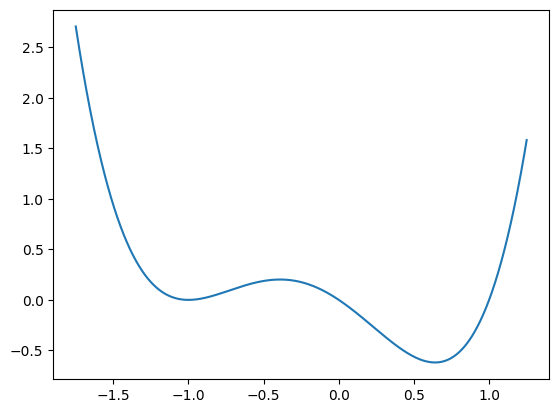

In [22]:
p = plot(x,f(x));

$ x_{\text{new}} = x_{\text{old}} - \frac{\nabla^2 f(x_0) }{\nabla f(x_0)}$

In [23]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

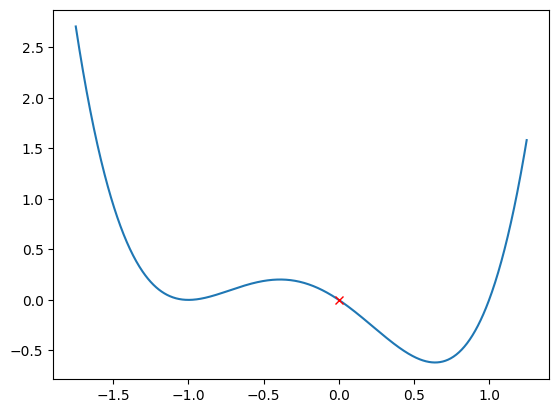

In [39]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx");


It finds a maximum or minimum.

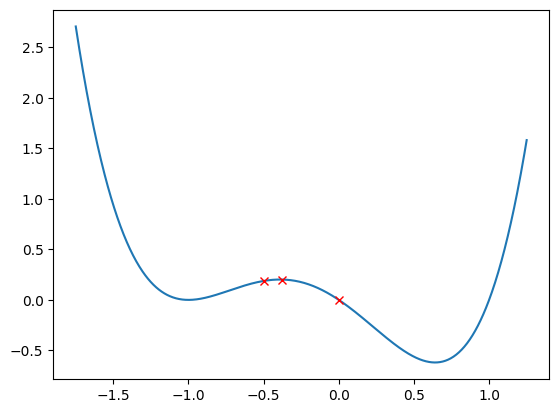

In [41]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx");


In [42]:
∇2f(0.0)

-2.0

Regularization of Newton Method.

In [43]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H) #is positive definite
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

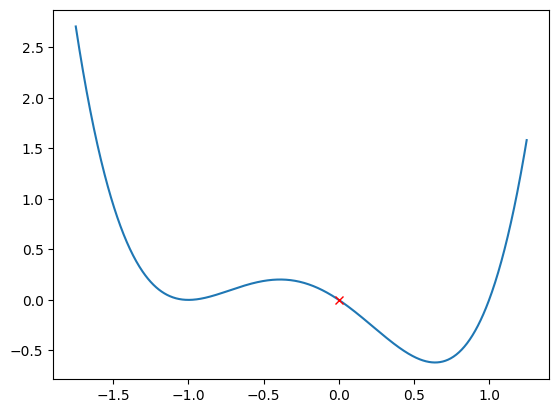

In [47]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx");

Finds the minimum.

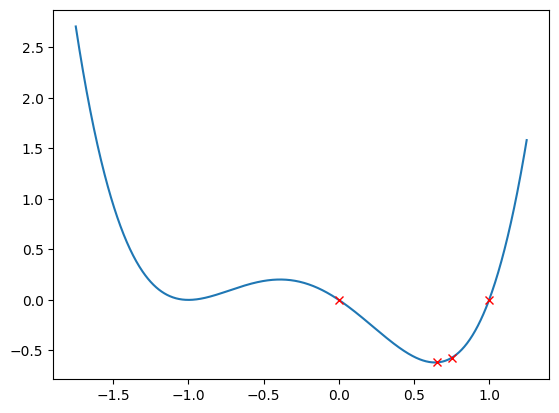

In [52]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx");